# Simulating OFDM



In [1]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22})
import numpy as np
import scipy 
from scipy.io import loadmat
from scipy.stats import norm
import sys
import yaml

sys.path.insert(0,"../")
from tools import *

In [67]:
# Parameters for the problem statement

# Frequency domain characteristics
f_s = 122.88e6              # sampling rate in SPS (symbols/second; symbol = complex number?)
num_subcarriers = 4096      # total number of subcarriers, including both the useful and not useful ones
scs = 30e3                  # subcarrier spacing in Hz
num_useful_sub = 3072       # total number of useful subcarriers along which data is transmitted


# Timing synchronization and channel estimation
preamble_length = 64               # length of the preamble sequence
path_preamble = "./preamble.mat"   # path to the file containing preamble to be used for timing synchronization
path_pilots = "./pilots.mat"       # path to the file containing pilots for channel estimation

# Time domain structure
num_ofdm_slot = 14          # number of ofdm symbols per slot
CP_one = 352                # CP of the first symbol
CP_n = 288                  # CP of the remaining 13 symbols


# Channel information       
path_channel = "./channel.txt"

# reading in the channel
with open(path_channel, "r") as file:
    channel = file.read()
channel = channel.strip().split("\n")
channel = np.array([float(channel[i]) for i in range(len(channel))])
k = len(channel)             # number of taps in the channel frequency response (discrete)

# timing offset
DT = 12                     # maximum number of zeros to be added before every frame to introduce timing offset

In the bit to bit OFDM system, bits are mapped to the constellation points as given below.

![title](./bit_to_constellation.png)

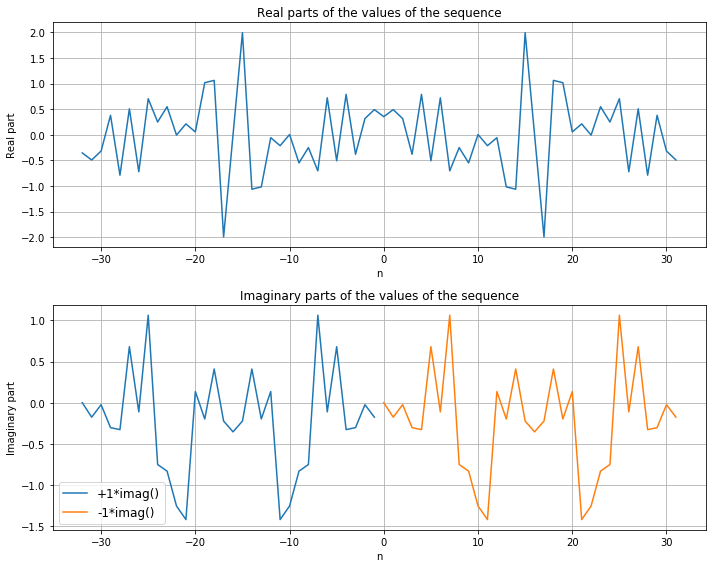

In [70]:
# loading the preamble sequence

preamble = loadmat(path_preamble)
preamble_sequence = np.squeeze(preamble["sequence_snc"])
length_preamble = len(preamble_sequence)
real = np.squeeze(preamble_sequence.real)
imaginary = np.squeeze(preamble_sequence.imag)

# visualizing symmetry of the preamble (given to be symmetric)
x_vals = np.arange(-length_preamble//2, length_preamble//2)
plt.figure(figsize = (10,8))
plt.subplot(211)
plt.title("Real parts of the values of the sequence")
plt.xlabel("n")
plt.ylabel("Real part")
plt.grid()
plt.plot(x_vals, real)

plt.subplot(212)
plt.title("Imaginary parts of the values of the sequence")
plt.xlabel("n")
plt.ylabel("Imaginary part")
plt.grid()
plt.plot(x_vals[:length_preamble//2], imaginary[:length_preamble//2], label = "+1*imag()")
plt.plot(x_vals[length_preamble//2:], -1*imaginary[length_preamble//2:], label = "-1*imag()") 
# negative because correlation is E(yy*) i.e conjugate?
plt.legend(fontsize = 12)

plt.tight_layout()
plt.show()

In [66]:
# def functions for 



# defining a few necessary functions

def simulate_QAM_generic():
    """Function to simulate generation, transmission and receiving of QAM symbols, generic channel
    """
    
    pass

def visualise_QAM(M, mapping):
    """Function to plot the constellation
    
    Calling this function results in a plot of the desired consteallation
    
    Args:
        M (int): number of constellation points in the M-QAM
        mapping (list): mapping of symbols to a coordinate 
            system
        
    """
    
    plt.figure(figsize = (10,8))
    plt.title(str(M) + "-QAM")
    plt.xlabel("$\phi_1$")
    plt.ylabel("$\phi_2$")
    plt.grid()
    plt.scatter(mapping[:,0], mapping[:,1])
    plt.axhline(linewidth=2, color='k')
    plt.axvline(linewidth=2, color='k')
    plt.show()
    plt.close()
    
########################### Creating constellations ##############################

def generate_BPSK(i):
    """Function to generate a BPSK symbol from a given bit
    
   Maps supplied bit to a complex number as given above
    
    Args:
        i (int): bit (0 or 1)
        
    Returns:
        symbol (complex number): a BPSK symbol
        
    """
    symbol = (1/np.sqrt(2))*((1 - 2*i) + (1 - 2*i)*(1j))
    
    return symbol


def generate_QPSK(i,i_next):
    """Function to generate a QPSK symbol from given bits
    
   Maps supplied bits to complex numbers as given above
    
    Args:
        i (int): the first bit of the pair of bits to be 
            mapped to a QPSK symbol
        i_next (int): the second bit of the pair of bits to be 
            mapped to a QPSK symbol
        
    Returns:
        symbol (complex number): a QPSK symbol
        
    """ 
    symbol = (1/np.sqrt(2))*((1 - 2*i) + (1 - 2*i_next)*(1j))
    return symbol    

def generate_16QAM(i1, i2, i3, i4):
    """Function to generate a QPSK symbol from given bits
    
   Maps supplied bits to complex numbers as given above
    
    Args:
        in (int): nth of the four bits to be mapped to a QPSK 
        symbol
        
    Returns:
        symbol (complex number): a 16 QAM symbol
        
    """ 
    symbol = (1/np.sqrt(10))*((1-2*i1)*(2-(1-2*i3)) + (1 - 2*i2)*(2-(1-2*i4))*(1j))
    return symbol